(lecture06:homework)=
# Homework 6

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

```{note}
+ Please match all the pages corresponding to each of the questions when you submit on gradescope.
```

## Student details

+ **First Name:** Ben
+ **Last Name:** Mariner
+ **Email:** marinerb@purdue.edu

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')
import requests
import os
def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)

/tmp/ipython-input-1846507495.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', 'svg')


## Problem 1 - Loops and conditionals

Consider the following list:

In [2]:
data = [1, 4, 3, 10, 4, 3, 4, 4]

+ Write a loop that computes the average of the elements in the list and ``print`` the result using two significant digits.

In [6]:
sum = 0
for i in data:
  sum += i
Avg = sum / len(data)
print(f"{Avg:.2f}")

4.12


+ Write code that finds the number of times the element 4 occurs in the list. Hint: Use a loop and an if-statement.

In [8]:
Four_Count = 0
for i in data:
  if i == 4:
    Four_Count += 1
print(Four_Count)


4


+ Write a Python function that takes a list as an argument and returns the number of times a given element (also passed as an argument to the function) appears in the list. Call that function ``find_number_of_occurences(a, elm)``. Make sure you follow best practices when writing the docstring of your function.

In [14]:
def find_number_of_occurences(a, elm):
  """
  Count the number of times a given element appears in a list.
  Parameters
      a : list
        The list in which to search for the element.
     elm : any
        The element whose occurrences are to be counted.

   Returns
   int
       The number of times `elm` appears in the list `a`.
  """
  count = 0
  for i in a:
    if i == elm:
      count += 1
  return count

In [15]:
# Try your code here:
help(find_number_of_occurences)

Help on function find_number_of_occurences in module __main__:

find_number_of_occurences(a, elm)
    Count the number of times a given element appears in a list.
    Parameters
        a : list
          The list in which to search for the element.
       elm : any
          The element whose occurrences are to be counted.

     Returns
     int
         The number of times `elm` appears in the list `a`.



In [16]:
Result = find_number_of_occurences(data, 4)
print(Result)

4


+ Write a Python function that takes a list as an argument and returns the number of elements that are greater than a given element (also passed as an argument to the function). Call that function ``find_number_of_elms_greater_than(a, elm)``. Make sure you follow best practices when writing the docstring of your function.

In [17]:
def find_number_of_elms_greater_than(a, elm):
  """
  Count the number of elements in a list that are greater than a given element.
  Parameters
      a : list
        The list in which to search for the element.
     elm : any
        The element whose occurrences are to be counted.

   Returns
   int
       The number of elements in the list `a` that are greater than `elm`.
  """
  count = 0
  for i in a:
    if i > elm:
      count += 1
  return count

In [18]:
help(find_number_of_elms_greater_than)

Help on function find_number_of_elms_greater_than in module __main__:

find_number_of_elms_greater_than(a, elm)
    Count the number of elements in a list that are greater than a given element.
    Parameters
        a : list
          The list in which to search for the element.
       elm : any
          The element whose occurrences are to be counted.

     Returns
     int
         The number of elements in the list `a` that are greater than `elm`.



In [19]:
Result1 = find_number_of_elms_greater_than(data, 3)
print(Result1)

5


## Problem 2 - High-performance buildings revisited

In this problem we will continue analyzing the high-performance buildings dataset we introduced in {ref}`lecture03:homework:problem1` and with which we played in {ref}`lecture06:selecting-rows`.
Let me set you up by downloading and cleaning the data file:

In [22]:
import pandas as pd
!curl -O 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-239-intro-to-data-science/master/data/temperature_raw.xlsx'

df = pd.read_excel('temperature_raw.xlsx')
df = df.dropna(axis=0)
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  277k  100  277k    0     0  1857k      0 --:--:-- --:--:-- --:--:-- 1865k


,household,date,score,t_out,t_unit,hvac
0,a1,2018-01-07,100.0,4.283373,66.693229,246.473231
1,a10,2018-01-07,100.0,4.283373,66.356134,5.492116
2,a11,2018-01-07,58.0,4.283373,71.549132,402.094327
3,a12,2018-01-07,64.0,4.283373,73.429514,211.692244
4,a13,2018-01-07,100.0,4.283373,63.923937,0.850536


+ Plot the external temperature `t_out`

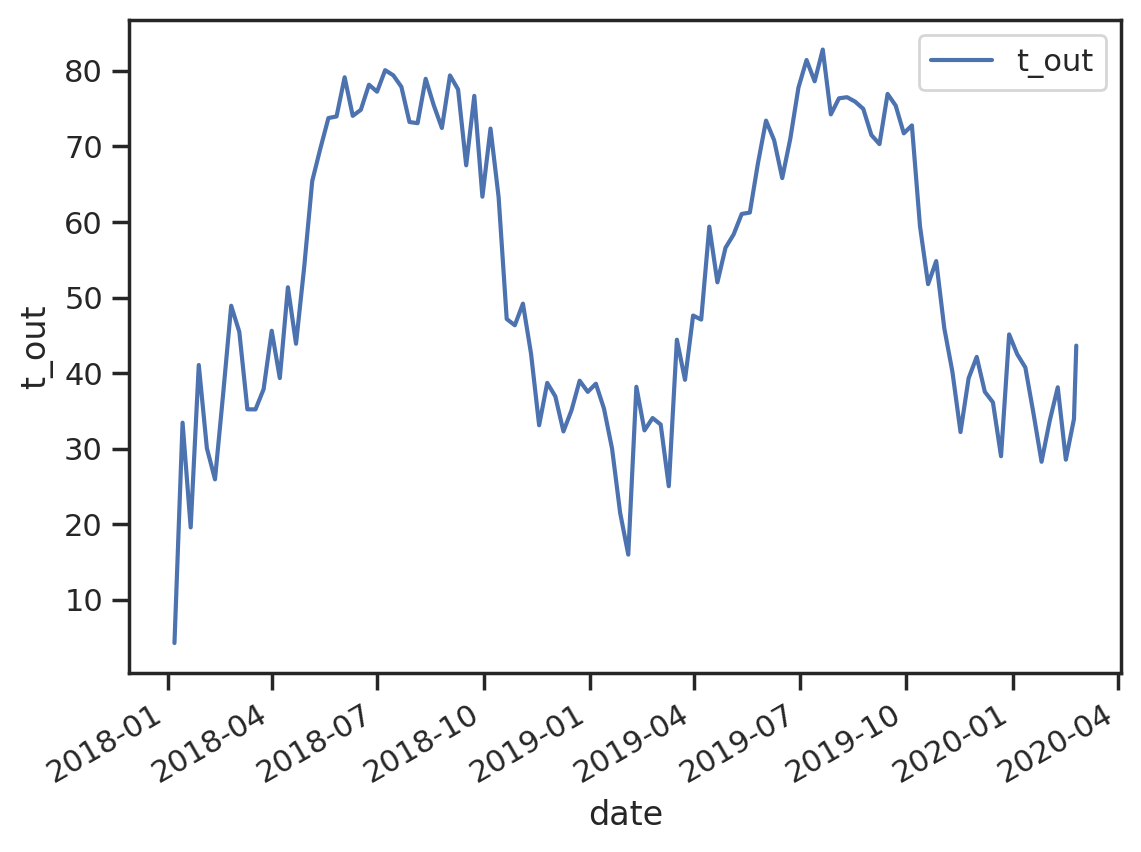

In [29]:
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
df.plot(x='date', y='t_out');
plt.ylabel('t_out');

+ Extract the data pertaining to household `a5`.
Put the result in a new dataframe called `df_a5`.

In [33]:
df_a5 = df[df['household'] == 'a5'].copy()
display(df_a5.head())

,household,date,score,t_out,t_unit,hvac
11,a5,2018-01-07,64.0,4.283373,74.854456,286.011150
61,a5,2018-01-14,78.0,33.444172,74.786855,137.786711
111,a5,2018-01-21,67.0,19.584102,75.463740,229.760337
161,a5,2018-01-28,74.0,41.076513,75.382341,79.433718
211,a5,2018-02-04,64.0,30.065774,75.676811,118.032515


+ For household `a5`, plot `t_unit` as a function of date.

<Figure size 1200x400 with 0 Axes>

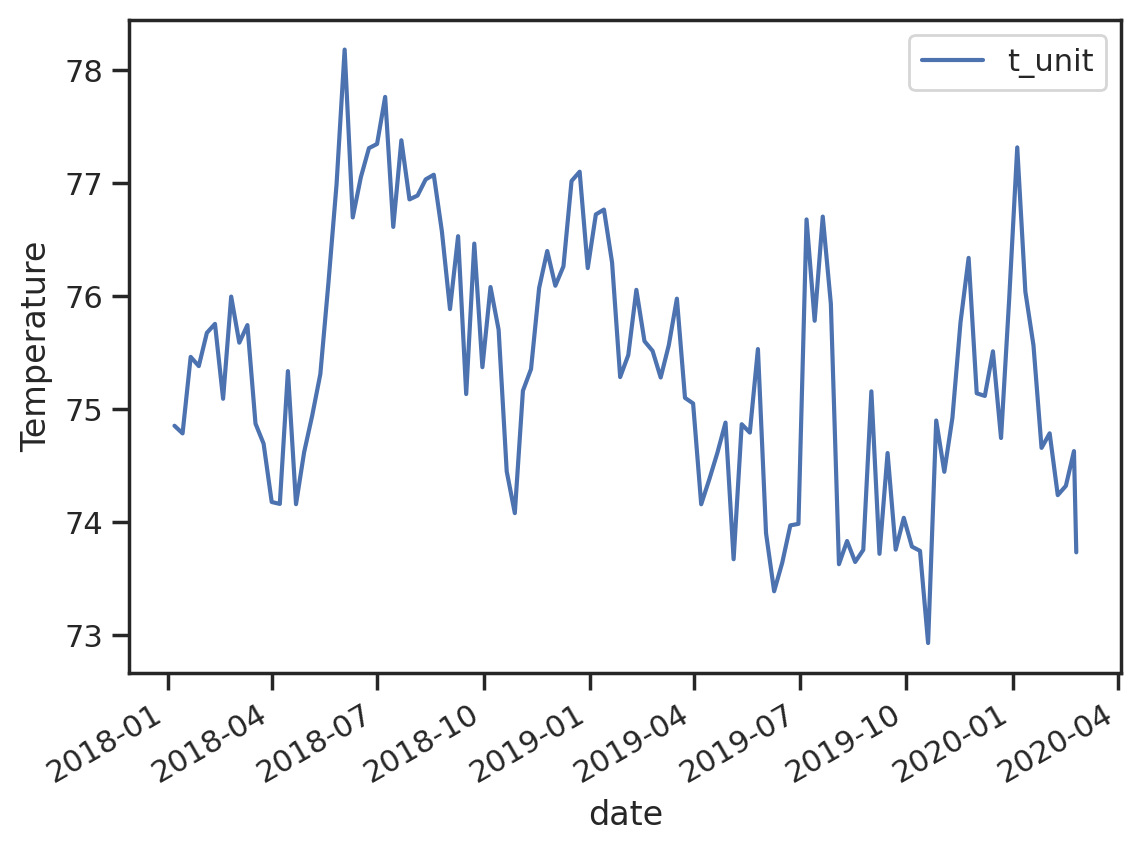

In [43]:
plt.figure(figsize=(12, 4));
df_a5.plot(x='date', y='t_unit');
plt.ylabel('Temperature');
plt.show()

+ In a single figure, plot `date` vs `t_unit` for households `a5` and `a11`.

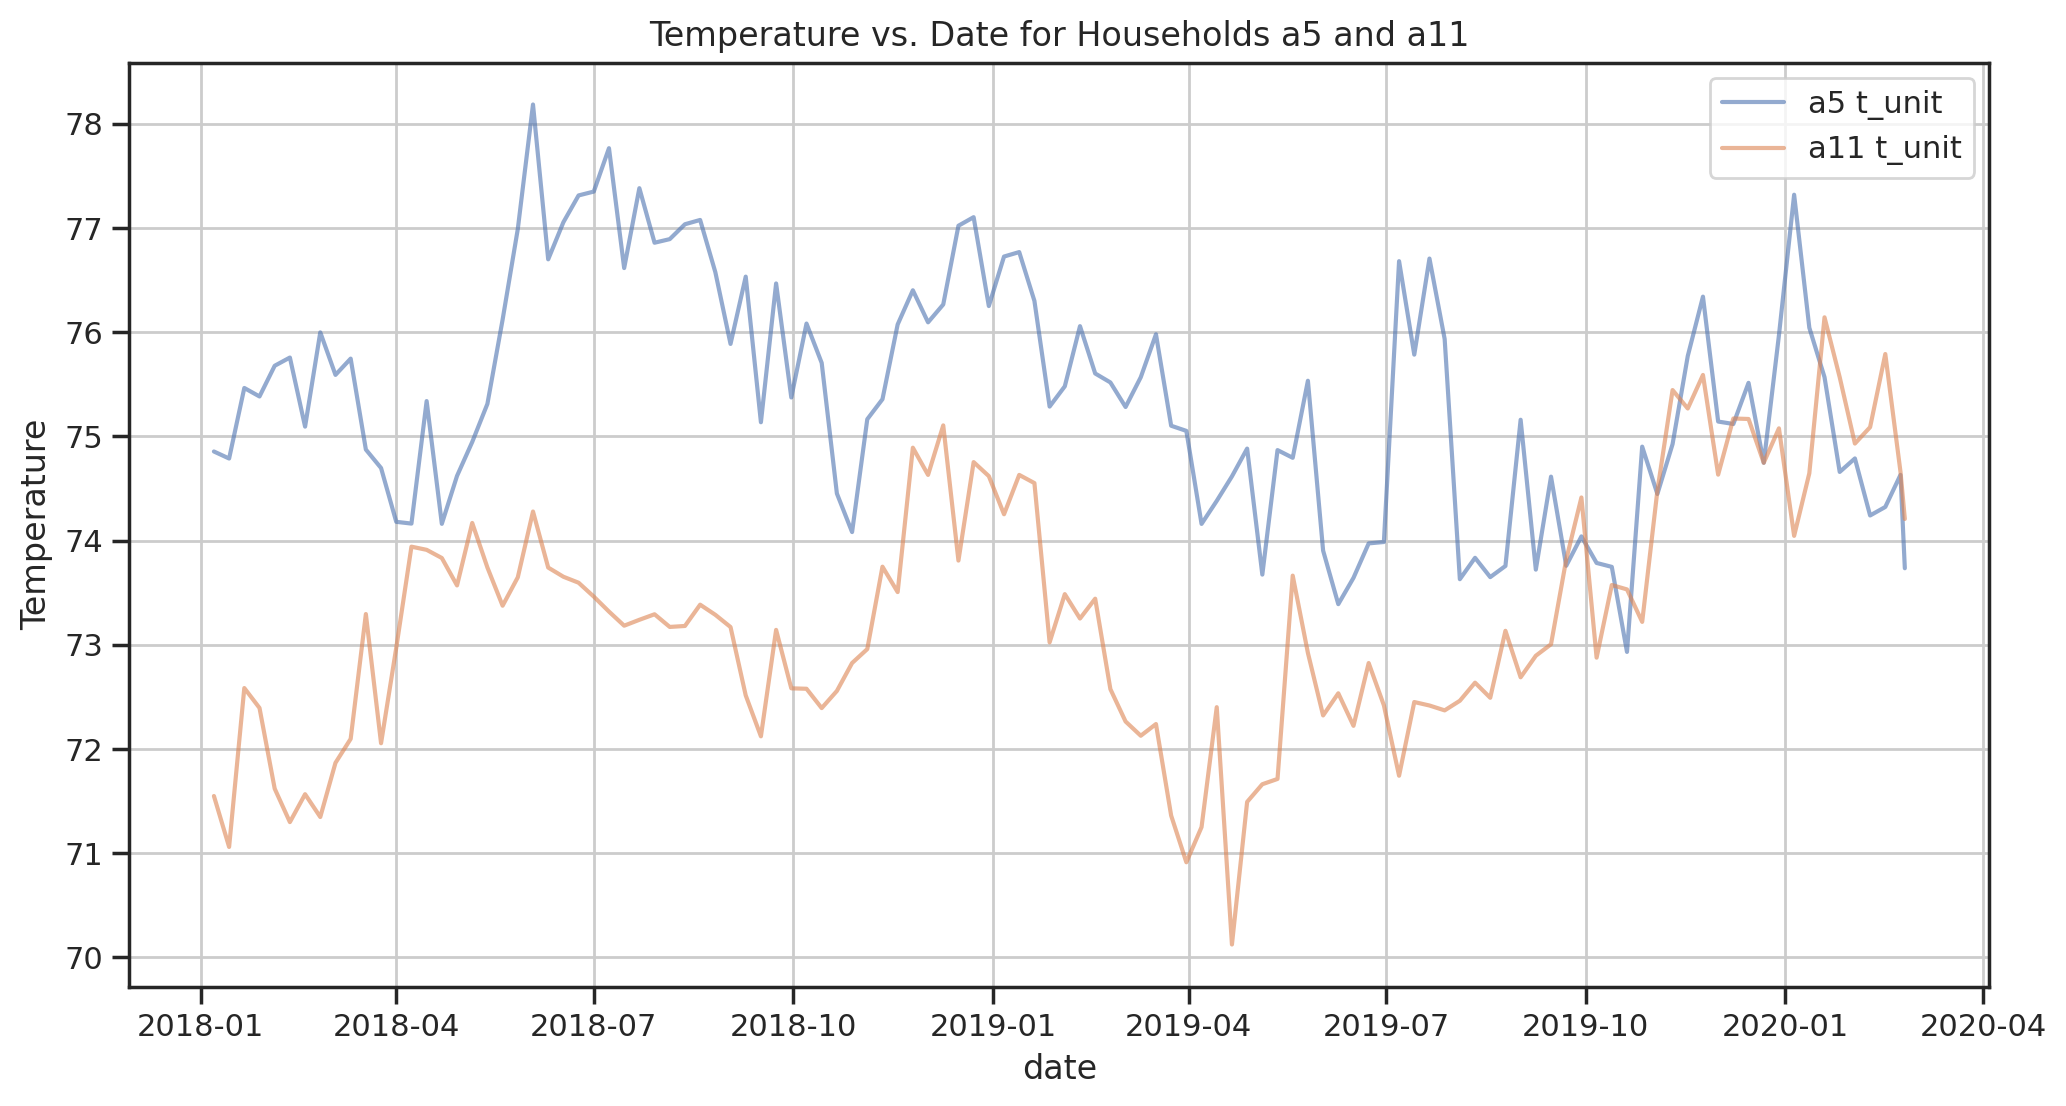

In [47]:
df_a11 = df[df['household'] == 'a11'].copy()


plt.figure(figsize=(12, 6))

plt.plot(df_a5['date'], df_a5['t_unit'], label='a5 t_unit', alpha=0.6)
plt.plot(df_a11['date'], df_a11['t_unit'], label='a11 t_unit', alpha=0.6)

plt.xlabel('date')
plt.ylabel('Temperature')
plt.title('Temperature vs. Date for Households a5 and a11')
plt.legend()
plt.grid(True)
plt.show()

+ In the same figure, plot the `t_out` and `t_unit` scatter plots for both households `a5` and `a11`.

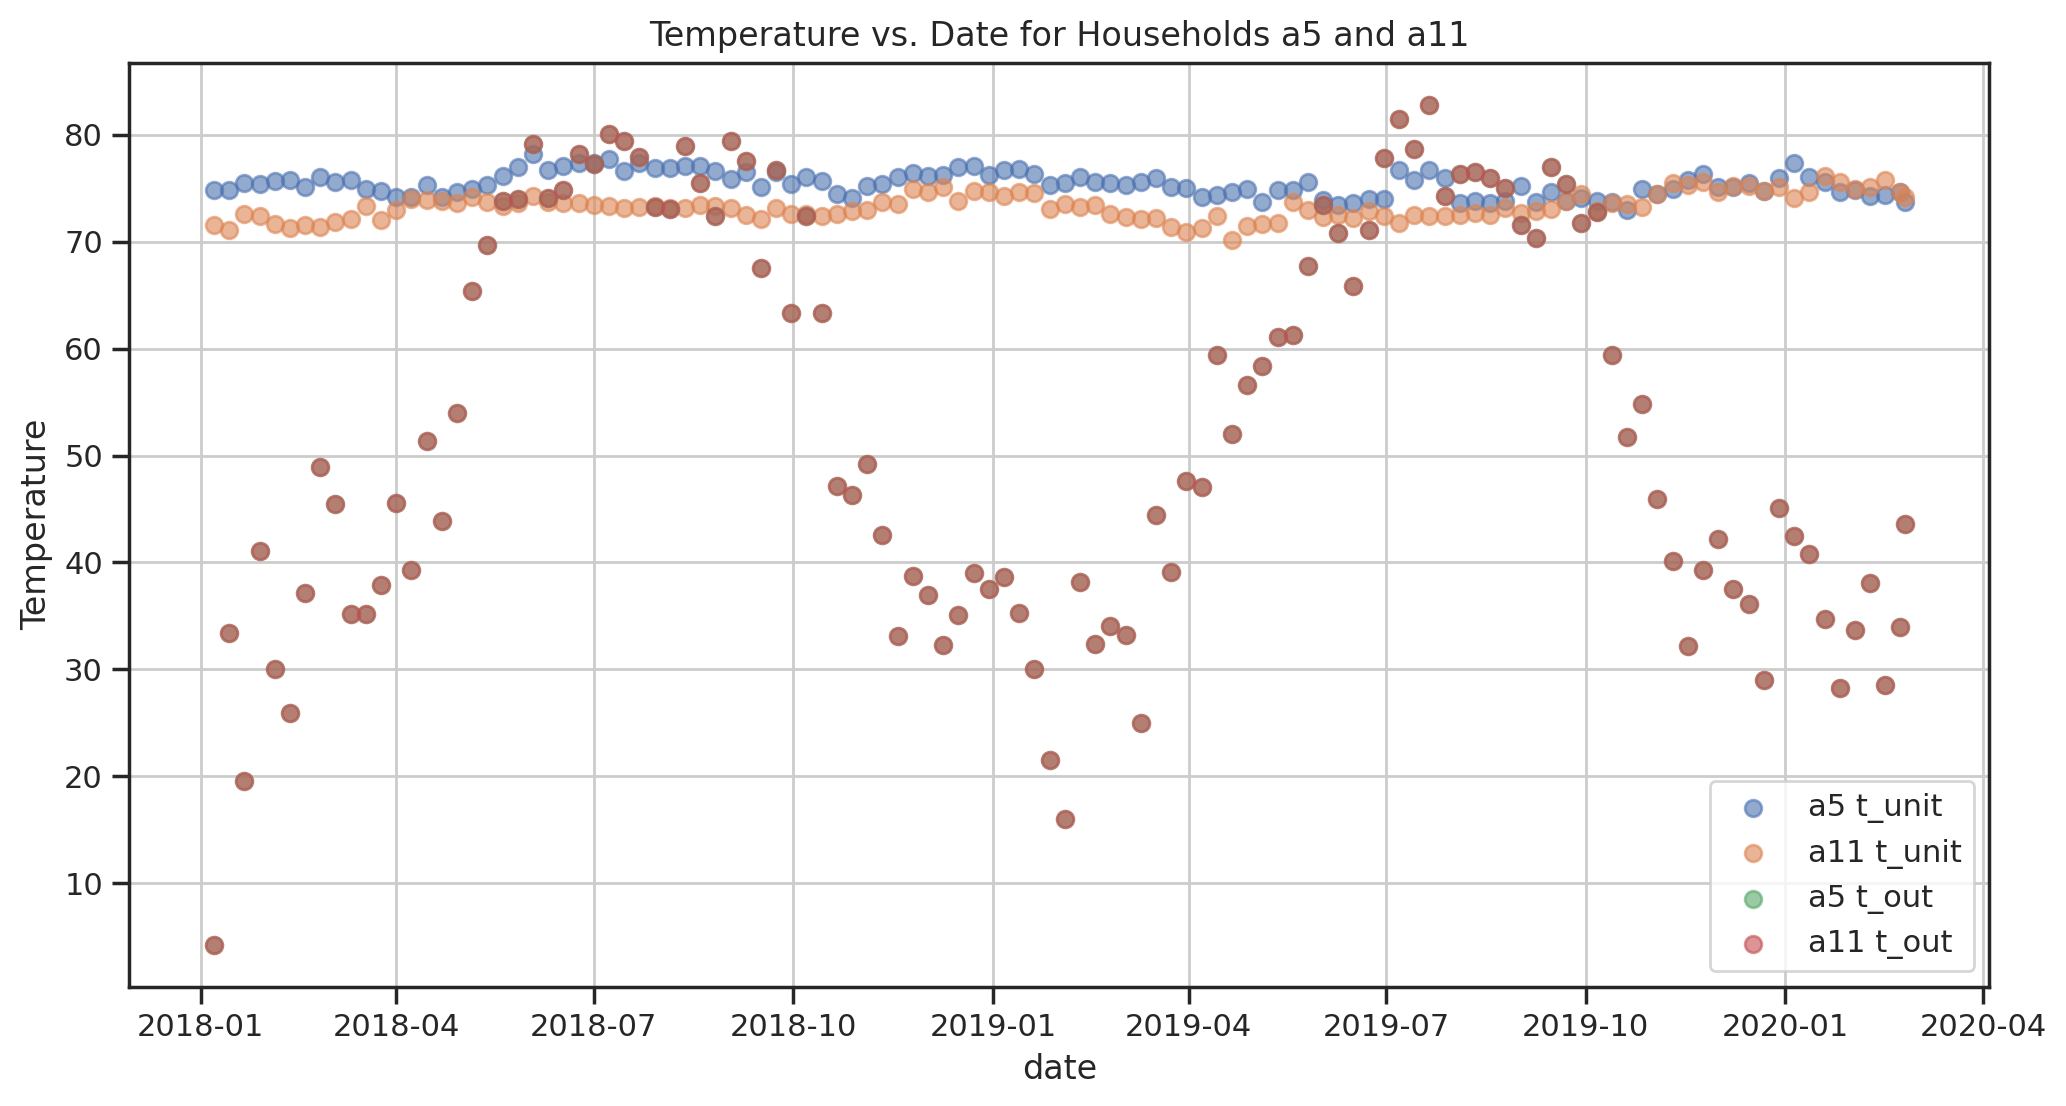

In [55]:
df_a11 = df[df['household'] == 'a11'].copy()

plt.figure(figsize=(12, 6))

plt.scatter(df_a5['date'], df_a5['t_unit'], label='a5 t_unit', alpha=0.6)
plt.scatter(df_a11['date'], df_a11['t_unit'], label='a11 t_unit', alpha=0.6)
plt.scatter(df_a5['date'], df_a5['t_out'], label='a5 t_out', alpha=0.6)
plt.scatter(df_a11['date'], df_a11['t_out'], label='a11 t_out', alpha=0.6)

plt.xlabel('date')
plt.ylabel('Temperature')
plt.title('Temperature vs. Date for Households a5 and a11')
plt.legend()
plt.grid(True)
plt.show()

+ In the same figure, plot the `t_out` and `hvac` scatter plots for both households `a5` and `a11`.

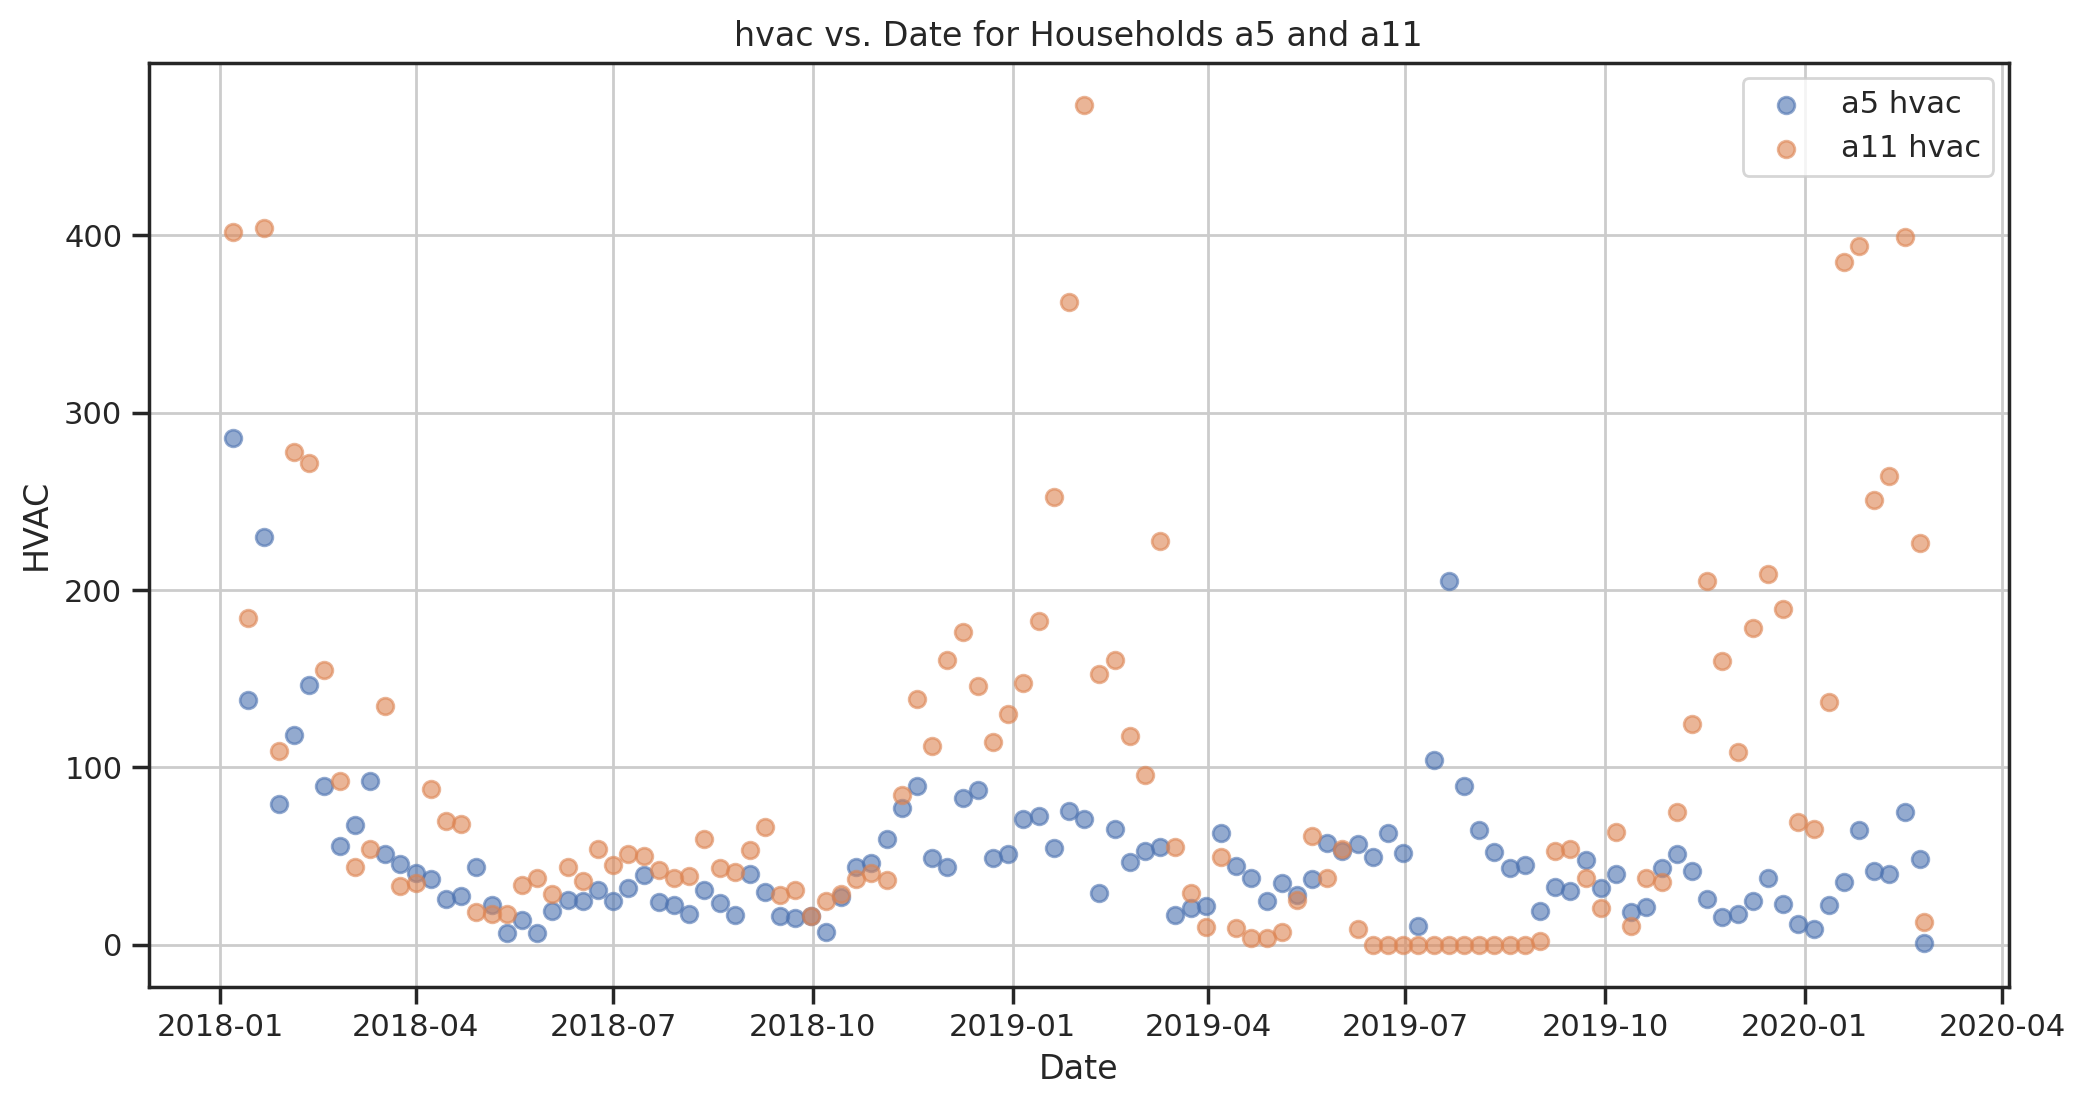

In [57]:
plt.figure(figsize=(12, 6))

plt.scatter(df_a5['date'], df_a5['hvac'], label='a5 hvac', alpha=0.6)
plt.scatter(df_a11['date'], df_a11['hvac'], label='a11 hvac', alpha=0.6)

plt.xlabel('Date')
plt.ylabel('HVAC')
plt.title('hvac vs. Date for Households a5 and a11')
plt.legend()
plt.grid(True)
plt.show()

+ In the same figure, plot the histogram of `t_unit` for households `a5` and `a11`.
Which household prefers cooler temperatures?
Hint: To make the histogram more appealing use the keywords ``density=True, alpha=0.25``.

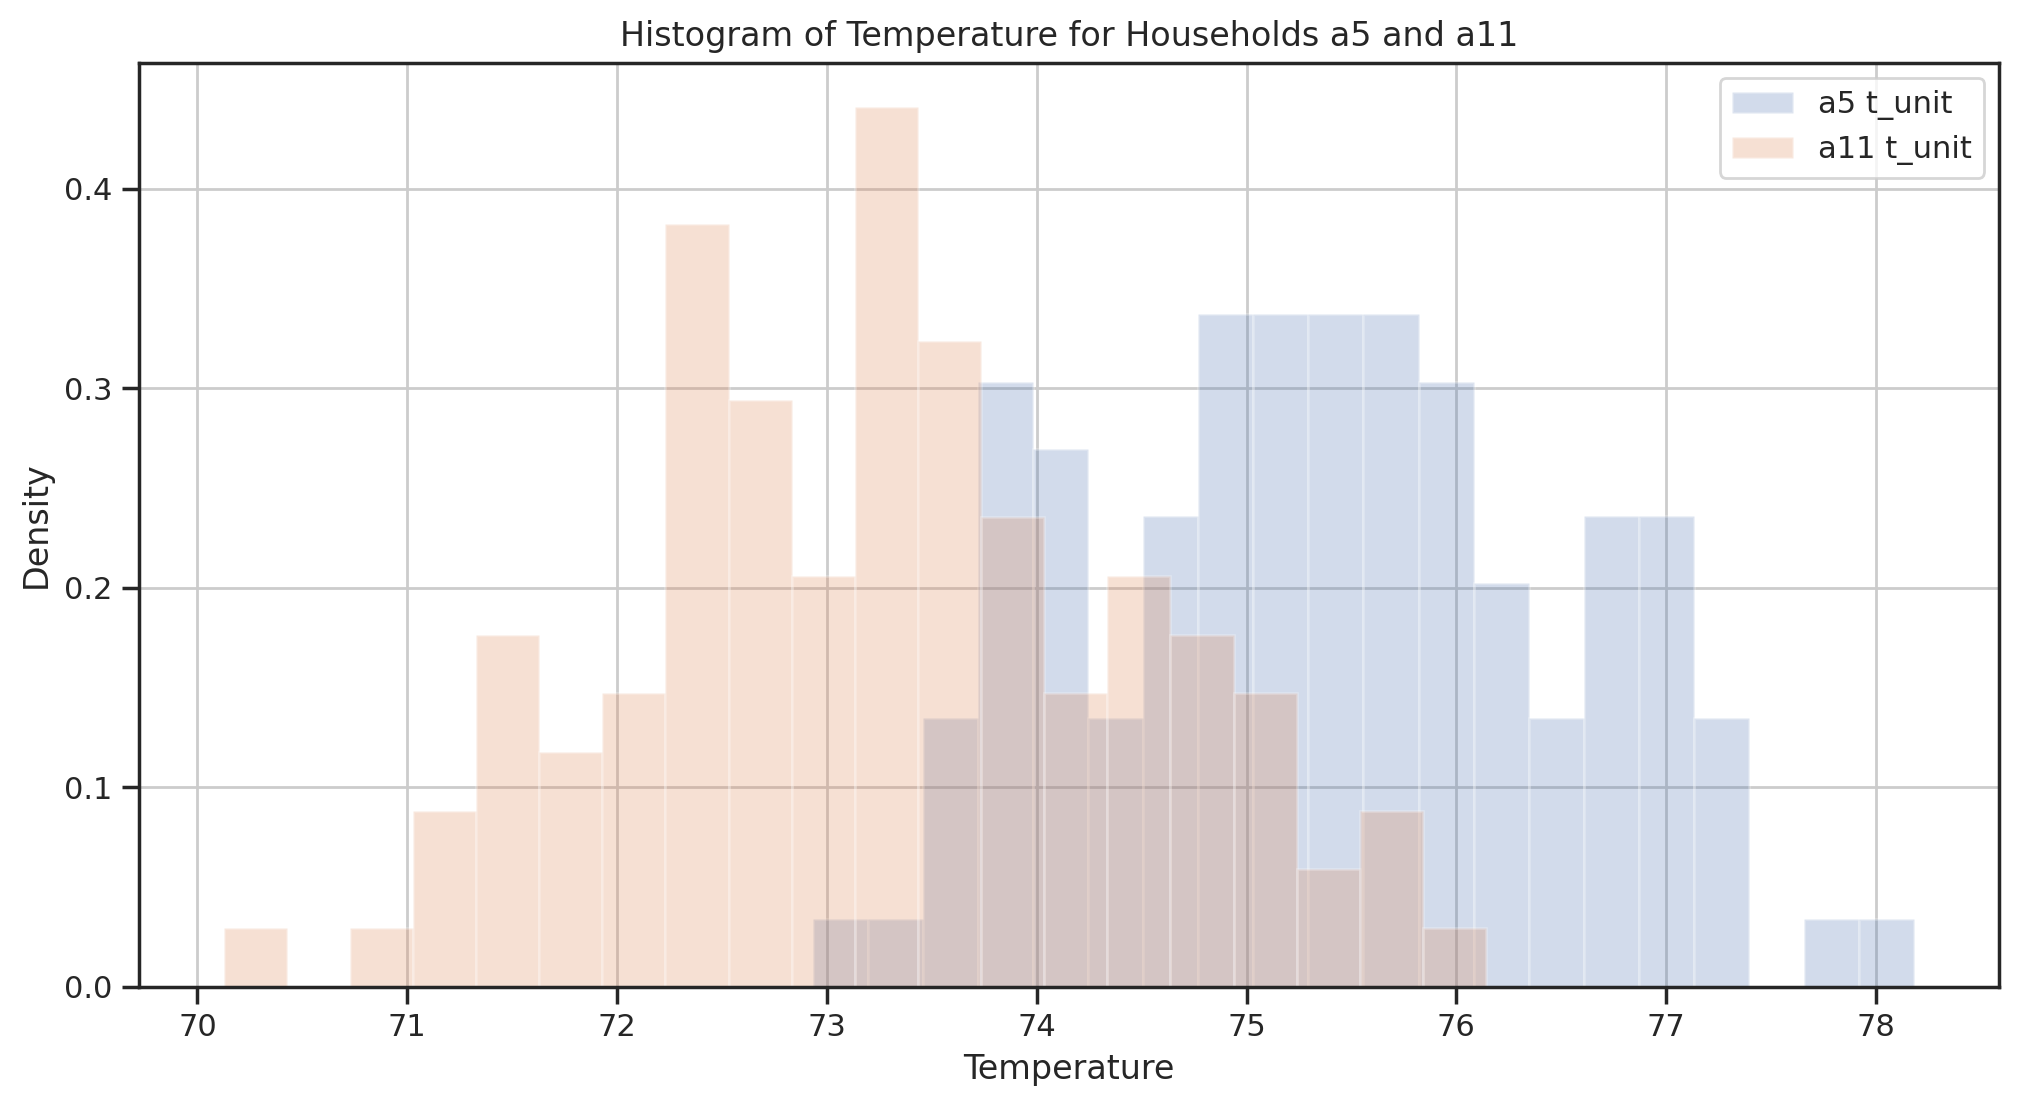

In [58]:
plt.figure(figsize=(12, 6))

plt.hist(df_a5['t_unit'], bins=20, density=True, alpha=0.25, label='a5 t_unit')
plt.hist(df_a11['t_unit'], bins=20, density=True, alpha=0.25, label='a11 t_unit')

plt.xlabel('Temperature')
plt.ylabel('Density')
plt.title('Histogram of Temperature for Households a5 and a11')
plt.legend()
plt.grid(True)
plt.show()

a11 prefers cooler temperatures year round. The histogram for a11 is on the left of the graph compared to a5 showing that they more frequently use lower temperatures.

+ In the same figure, plot the histogram of `hvac` for households `a5` and `a11`.
Which household is more energy efficient (if any) and why?

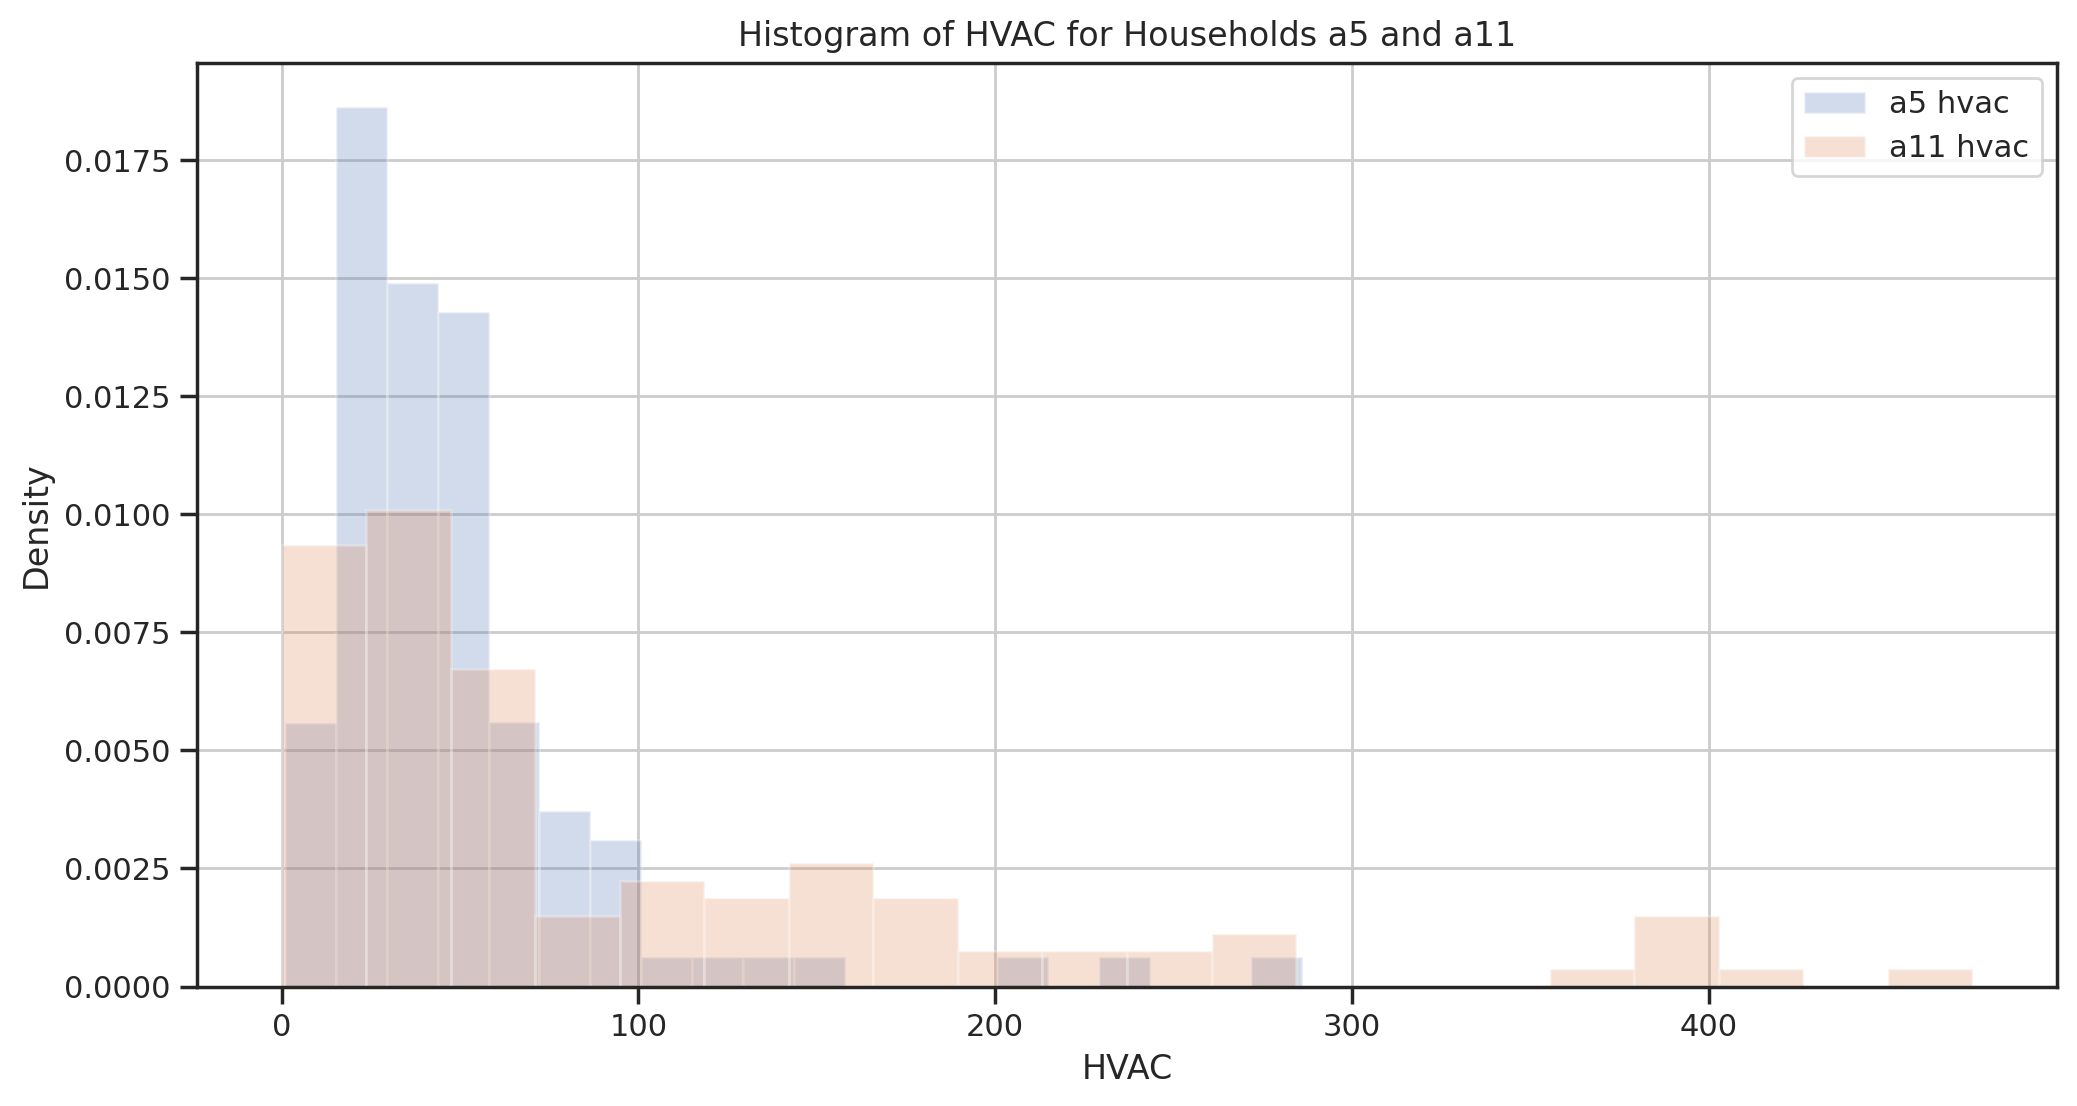

In [59]:
plt.figure(figsize=(12, 6))

plt.hist(df_a5['hvac'], bins=20, density=True, alpha=0.25, label='a5 hvac')
plt.hist(df_a11['hvac'], bins=20, density=True, alpha=0.25, label='a11 hvac')

plt.xlabel('HVAC')
plt.ylabel('Density')
plt.title('Histogram of HVAC for Households a5 and a11')
plt.legend()
plt.grid(True)
plt.show()

a5 is more efficient because it is shifted and concentrated on the left. Meanwhile a11 extends further right and to higher HVAC values.

+ Repeat the analysis above for households `b17` and `c40`. Which household prefers cooler temperatures and which one is more energy efficient?

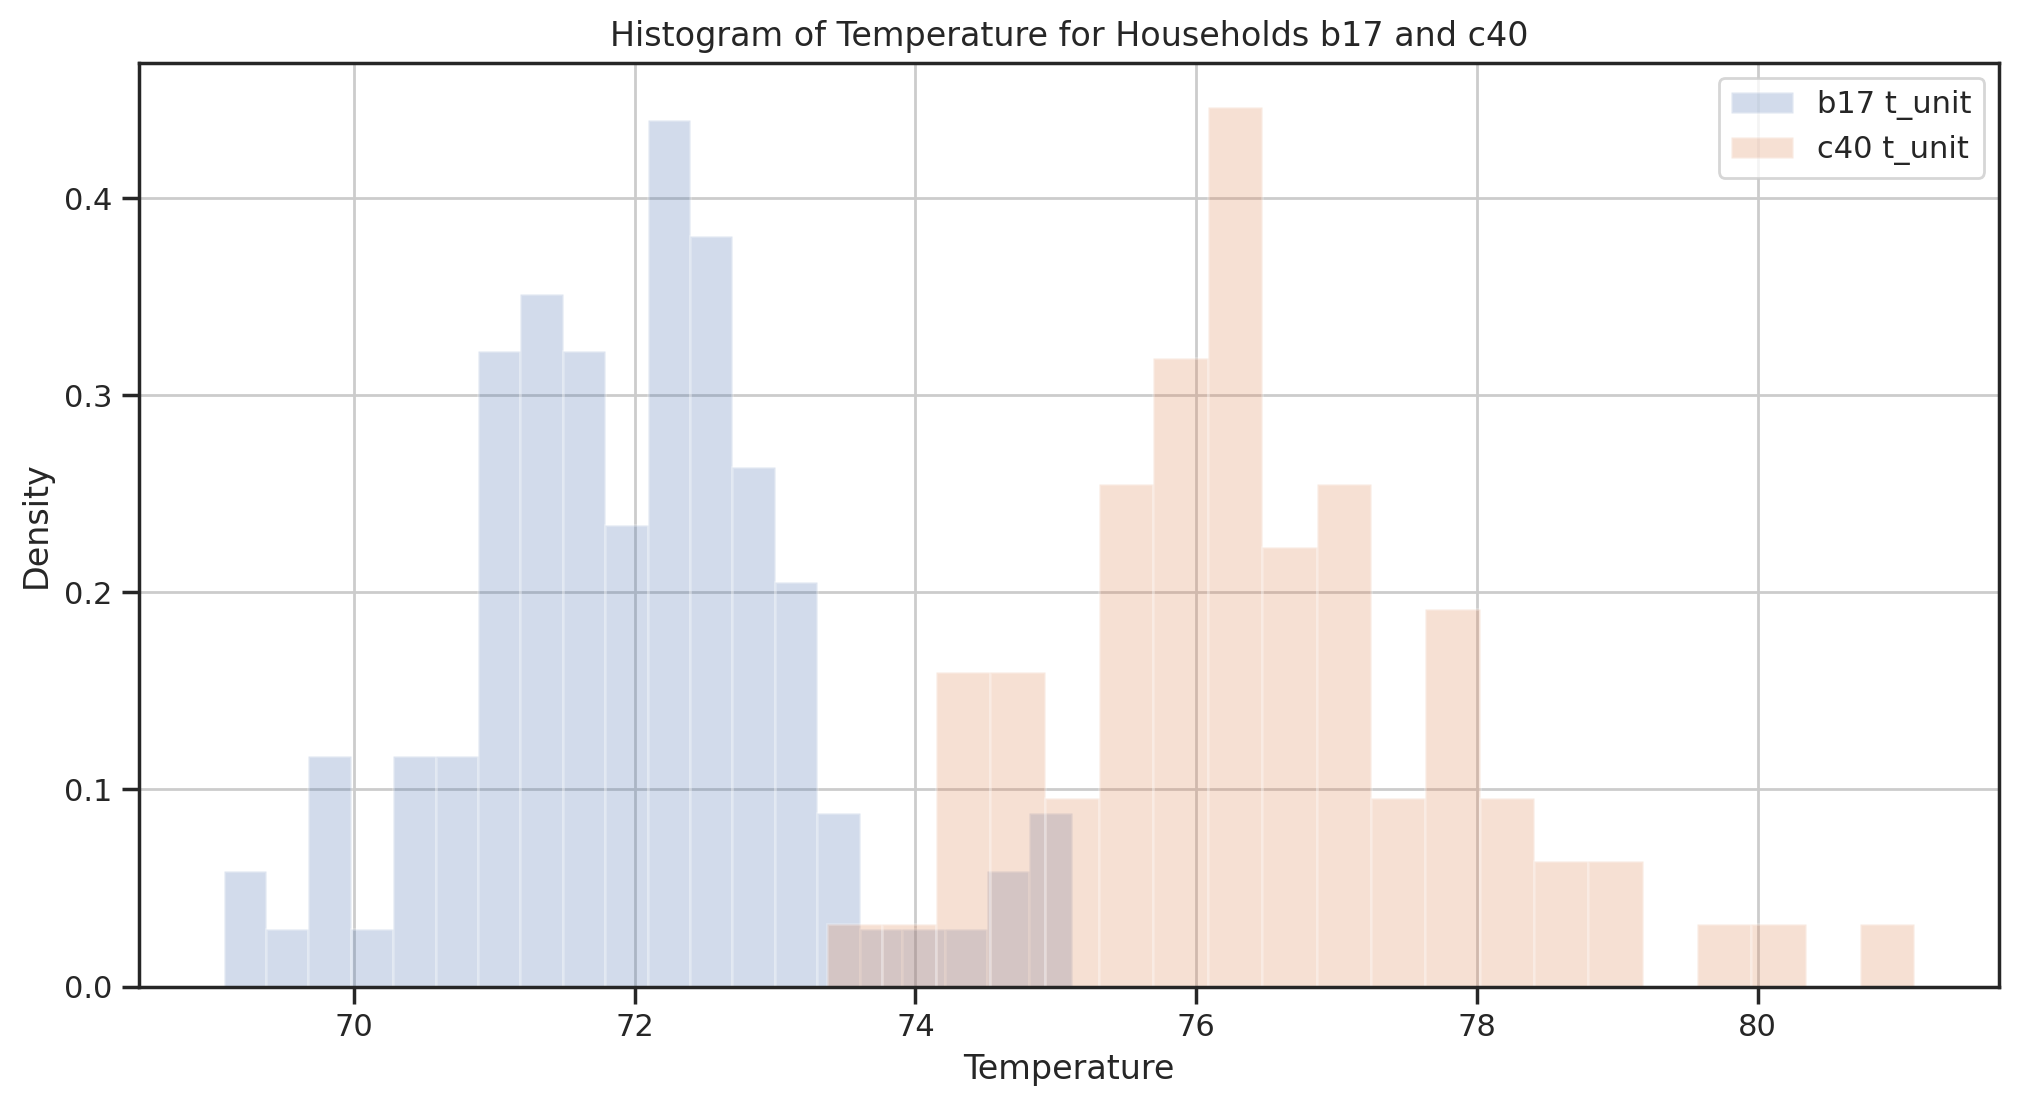

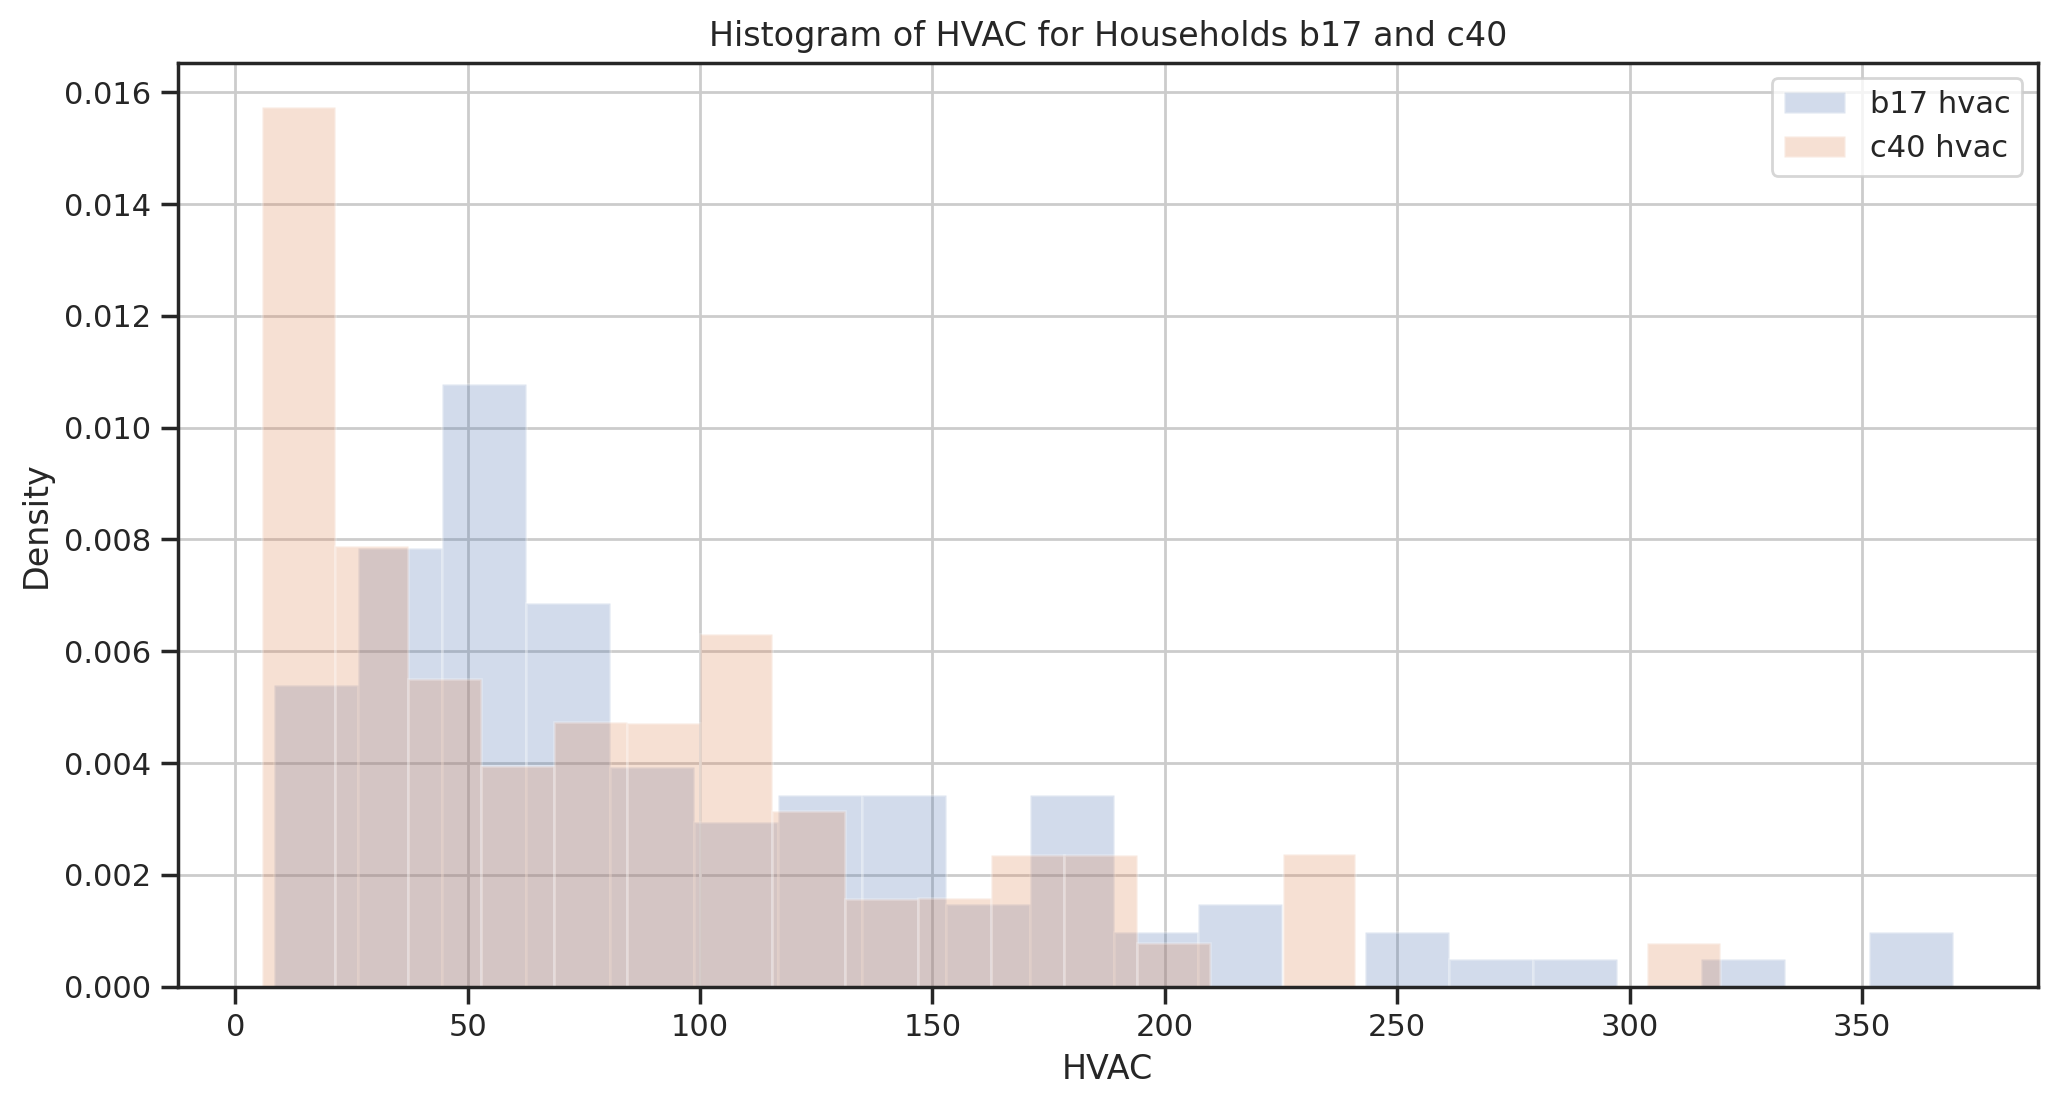

In [60]:
df_b17 = df[df['household'] == 'b17'].copy()
df_c40 = df[df['household'] == 'c40'].copy()

plt.figure(figsize=(12, 6))

plt.hist(df_b17['t_unit'], bins=20, density=True, alpha=0.25, label='b17 t_unit')
plt.hist(df_c40['t_unit'], bins=20, density=True, alpha=0.25, label='c40 t_unit')

plt.xlabel('Temperature')
plt.ylabel('Density')

plt.title('Histogram of Temperature for Households b17 and c40')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

plt.hist(df_b17['hvac'], bins=20, density=True, alpha=0.25, label='b17 hvac')
plt.hist(df_c40['hvac'], bins=20, density=True, alpha=0.25, label='c40 hvac')

plt.xlabel('HVAC')
plt.ylabel('Density')
plt.title('Histogram of HVAC for Households b17 and c40')
plt.legend()
plt.grid(True)
plt.show()

b17 likes it cooler because it has a higher frequency of lower Temperature values than c40. With similar distributions, b17's left shift shows lower household temperature. b17 also uses more energy which can be seen with a lower frequency of lower HVAC values. b17 shows many more high HVAC values than c40 as seen by how far b17 extends to the right.

Run the following code to convert the notebook to a pdf. Verify that the file path to the notebook is correct.

In [63]:
from google.colab import drive
drive.mount('/content/drive')
!apt-get install inkscape texlive texlive-xetex texlive-latex-extra pandoc --quiet
!pip install pypandoc --quiet
!jupyter nbconvert --to PDF '/content/drive/MyDrive/Colab Notebooks/Copy of homework_06.ipynb'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists...
Building dependency tree...
Reading state information...
inkscape is already the newest version (1.1.2-3ubuntu1).
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Colab Notebooks/Copy of homework_06.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
  